# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Dec  4 03:49:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu121


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

- for underfitting: model dose not know the training data well
  - use more layers and neurons
  - change activiation functions
  - train for longer
- for overfitting: model know the training data too well
  - use more data: get more data from sources
  - data augemntation: manipulate exisiting data to creat more of it
  - use less layers and neurons

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
import requests
import zipfile
from pathlib import Path

In [4]:
# 1. Get data

#setup data folder path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} dir exists alreay")
else:
  print(f"did not find {image_path}, will create")
  image_path.mkdir(parents=True, exist_ok=True)

  #download data
  with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downolading ...")
    f.write(request.content)

  #unzip data
  with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
    print("unzipping data ...")
    zip_ref.extractall(image_path)

did not find data/pizza_steak_sushi, will create
downolading ...
unzipping data ...


In [5]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [7]:
# Setup train and testing paths
train_path = Path("data/pizza_steak_sushi/train")
test_path = Path("data/pizza_steak_sushi/test")
train_path, test_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image path: data/pizza_steak_sushi/train/steak/922752.jpg
random image class name: steak
random image height: 512
random image width: 384


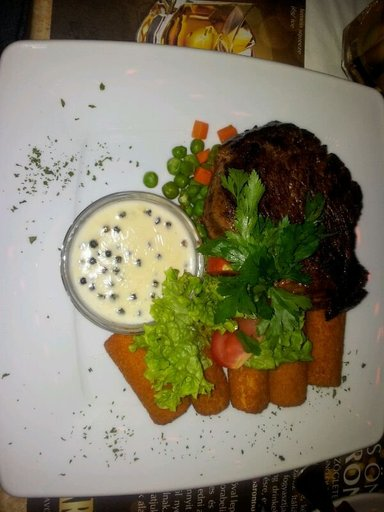

In [8]:
# Visualize an image
import random
from PIL import Image

# 2.1. Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
images_path_list = sorted(image_path.glob("**/*.jpg"))

# 2.2. Pick a random image path using Python's random.choice().
random_image = random.choice(images_path_list)


# 2.3. Get the image class name using pathlib.Path.parent.stem.
random_image_class_name = random_image.parent.stem

# 2.4. And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library).
img = Image.open(random_image)

# 2.5. We'll then show the image and print some metadata: path, class name, height, width
print(f"random image path: {random_image}")
print(f"random image class name: {random_image_class_name}")
print(f"random image height: {img.height}")
print(f"random image width: {img.width}")
img

(-0.5, 383.5, 511.5, -0.5)

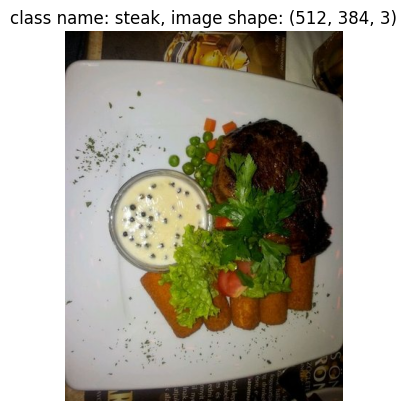

In [9]:
from pickle import FALSE
# Do the image visualization with matplotlib
# have to convert the image to a NumPy array first.

import matplotlib.pyplot as plt
import numpy as np

img_np_array = np.asarray(img)
plt.imshow(img_np_array)
plt.title(f"class name: {random_image_class_name}, image shape: {img_np_array.shape}")
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [10]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms

# Write transform for turning images into tensors
image_transform = transforms.Compose([
     transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [11]:
transformed_image = image_transform(img)

In [12]:
# Write a function to plot transformed images
def plot_transformed_img(tensor_img):
  tensor_img = tensor_img.permute(1,2,0)
  plt.axis(False)
  plt.imshow(tensor_img)

In [48]:
print(f"transformed_image as tensor: {transformed_image}")

transformed_image as tensor: tensor([[[0.0118, 0.0157, 0.0196,  ..., 0.2000, 0.1490, 0.1176],
         [0.0157, 0.0235, 0.0275,  ..., 0.1529, 0.1216, 0.0902],
         [0.0275, 0.0314, 0.0353,  ..., 0.1216, 0.0980, 0.0745],
         ...,
         [0.4000, 0.4902, 0.5490,  ..., 0.1333, 0.1255, 0.1059],
         [0.4039, 0.4235, 0.4196,  ..., 0.1961, 0.1882, 0.1765],
         [0.3569, 0.3922, 0.4078,  ..., 0.1647, 0.1647, 0.1490]],

        [[0.0157, 0.0235, 0.0275,  ..., 0.1569, 0.0824, 0.0510],
         [0.0235, 0.0275, 0.0353,  ..., 0.0902, 0.0549, 0.0353],
         [0.0314, 0.0353, 0.0392,  ..., 0.0549, 0.0471, 0.0275],
         ...,
         [0.3294, 0.4314, 0.5059,  ..., 0.1137, 0.1059, 0.0824],
         [0.3059, 0.3333, 0.3333,  ..., 0.1569, 0.1451, 0.1412],
         [0.2667, 0.2980, 0.3137,  ..., 0.1216, 0.1216, 0.1176]],

        [[0.0157, 0.0157, 0.0157,  ..., 0.0941, 0.0275, 0.0196],
         [0.0314, 0.0275, 0.0314,  ..., 0.0392, 0.0078, 0.0078],
         [0.0392, 0.0431, 0.0

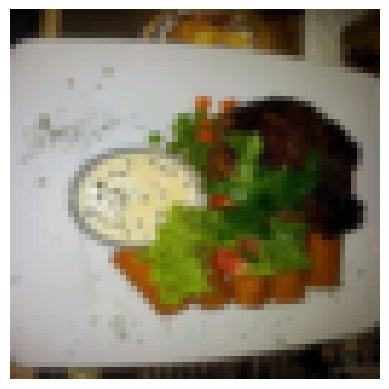

In [13]:
plot_transformed_img(transformed_image)

### Load image data using `ImageFolder`

In [14]:
from torchvision import datasets

In [15]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(
    root=train_path,
    transform=image_transform
  )
test_data = datasets.ImageFolder(
    root=test_path,
    transform=image_transform
  )

In [16]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [19]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x781ace8f11b0>,
 <torch.utils.data.dataloader.DataLoader at 0x781ace8f02b0>)

In [20]:
# How many batches of images are in our data loaders?
train_dataloader.batch_size

32

In [21]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 3, 64, 64])
Labels batch shape: torch.Size([32])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [22]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        # x = self.conv_block_1(x)
        # # print(x.shape)
        # x = self.conv_block_2(x)
        # # print(x.shape)
        # x = self.classifier(x)
        # # print(x.shape)
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion


In [23]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [24]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    train_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(train_pred, y)
    train_loss += loss.item() # .item() ??

    # 3. Optimizer zero grad
    optimizer.zero_grad()


    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    # if pred y == actual y
    y_pred_class = torch.argmax(torch.softmax(train_pred, dim=1),dim=1)
    train_acc += (y==y_pred_class).sum().item() / len(train_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= dataloader.batch_size
  train_acc /= dataloader.batch_size
  return train_loss, train_acc

In [25]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(torch.softmax(test_pred, dim=1),dim=1)
      test_acc += (y==y_pred_class).sum().item() / len(test_pred)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc

In [26]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [28]:
model_0.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [29]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2753 | train_acc: 0.0625 | test_loss: 1.0982 | test_acc: 0.2604
Epoch: 2 | train_loss: 0.2695 | train_acc: 0.1064 | test_loss: 1.1169 | test_acc: 0.2604
Epoch: 3 | train_loss: 0.2663 | train_acc: 0.1064 | test_loss: 1.1422 | test_acc: 0.2604
Epoch: 4 | train_loss: 0.2707 | train_acc: 0.0771 | test_loss: 1.1337 | test_acc: 0.3229
Epoch: 5 | train_loss: 0.2589 | train_acc: 0.1455 | test_loss: 1.1252 | test_acc: 0.2708


{'train_loss': [0.2753101699054241,
  0.26953770220279694,
  0.26628507301211357,
  0.27071522548794746,
  0.2589354123920202],
 'train_acc': [0.0625, 0.1064453125, 0.1064453125, 0.0771484375, 0.1455078125],
 'test_loss': [1.0981609026590984,
  1.1168609261512756,
  1.1422389149665833,
  1.1337291797002156,
  1.1251744230588276],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3229166666666667,
  0.2708333333333333]}

In [30]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2493 | train_acc: 0.1221 | test_loss: 1.0123 | test_acc: 0.3826
Epoch: 2 | train_loss: 0.2266 | train_acc: 0.1523 | test_loss: 1.0805 | test_acc: 0.3428
Epoch: 3 | train_loss: 0.2212 | train_acc: 0.1465 | test_loss: 1.0555 | test_acc: 0.3722
Epoch: 4 | train_loss: 0.1976 | train_acc: 0.1572 | test_loss: 0.9704 | test_acc: 0.4640
Epoch: 5 | train_loss: 0.2047 | train_acc: 0.1699 | test_loss: 1.0226 | test_acc: 0.3930
Epoch: 6 | train_loss: 0.2259 | train_acc: 0.1270 | test_loss: 1.0546 | test_acc: 0.4034
Epoch: 7 | train_loss: 0.1946 | train_acc: 0.1582 | test_loss: 0.9861 | test_acc: 0.4848
Epoch: 8 | train_loss: 0.1917 | train_acc: 0.1738 | test_loss: 1.0174 | test_acc: 0.3627
Epoch: 9 | train_loss: 0.2265 | train_acc: 0.1299 | test_loss: 0.9925 | test_acc: 0.4233
Epoch: 10 | train_loss: 0.2094 | train_acc: 0.1221 | test_loss: 0.9570 | test_acc: 0.5634
Epoch: 11 | train_loss: 0.1898 | train_acc: 0.1689 | test_loss: 1.0332 | test_acc: 0.3617
Epoch: 12 | train_l

{'train_loss': [0.24934571236371994,
  0.2265949510037899,
  0.22122818790376186,
  0.19759430922567844,
  0.20465085096657276,
  0.22592857666313648,
  0.1946319853886962,
  0.19166047498583794,
  0.22646178863942623,
  0.20939483493566513,
  0.1898195892572403,
  0.1907338136807084,
  0.1892773061990738,
  0.17867261171340942,
  0.23388994485139847,
  0.19447484984993935,
  0.19052827544510365,
  0.19486522860825062,
  0.1837992463260889,
  0.1711252685636282],
 'train_acc': [0.1220703125,
  0.15234375,
  0.146484375,
  0.1572265625,
  0.169921875,
  0.126953125,
  0.158203125,
  0.173828125,
  0.1298828125,
  0.1220703125,
  0.1689453125,
  0.16015625,
  0.1796875,
  0.171875,
  0.1513671875,
  0.166015625,
  0.1767578125,
  0.171875,
  0.17578125,
  0.1875],
 'test_loss': [1.0122867822647095,
  1.0804771184921265,
  1.0554988781611125,
  0.9704224268595377,
  1.022554636001587,
  1.0545517603556316,
  0.9860867460568746,
  1.0174399216969807,
  0.9925251007080078,
  0.9570395350456

In [31]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)
model_0_results = train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1781 | train_acc: 0.1826 | test_loss: 1.2738 | test_acc: 0.3532
Epoch: 2 | train_loss: 0.1871 | train_acc: 0.1738 | test_loss: 1.0368 | test_acc: 0.4631
Epoch: 3 | train_loss: 0.1555 | train_acc: 0.1924 | test_loss: 1.0174 | test_acc: 0.5038
Epoch: 4 | train_loss: 0.1394 | train_acc: 0.1953 | test_loss: 1.0537 | test_acc: 0.4934
Epoch: 5 | train_loss: 0.1397 | train_acc: 0.2021 | test_loss: 1.1174 | test_acc: 0.4536
Epoch: 6 | train_loss: 0.1467 | train_acc: 0.1973 | test_loss: 1.2147 | test_acc: 0.4640
Epoch: 7 | train_loss: 0.1427 | train_acc: 0.1865 | test_loss: 1.2851 | test_acc: 0.3939
Epoch: 8 | train_loss: 0.1485 | train_acc: 0.1914 | test_loss: 1.0333 | test_acc: 0.4839
Epoch: 9 | train_loss: 0.1601 | train_acc: 0.1689 | test_loss: 1.1018 | test_acc: 0.4536
Epoch: 10 | train_loss: 0.1463 | train_acc: 0.1865 | test_loss: 1.0968 | test_acc: 0.4839
Epoch: 11 | train_loss: 0.1294 | train_acc: 0.1973 | test_loss: 1.3288 | test_acc: 0.3532
Epoch: 12 | train_l

In [32]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [33]:
from typing import Dict, List
import matplotlib.pyplot as plt

In [34]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

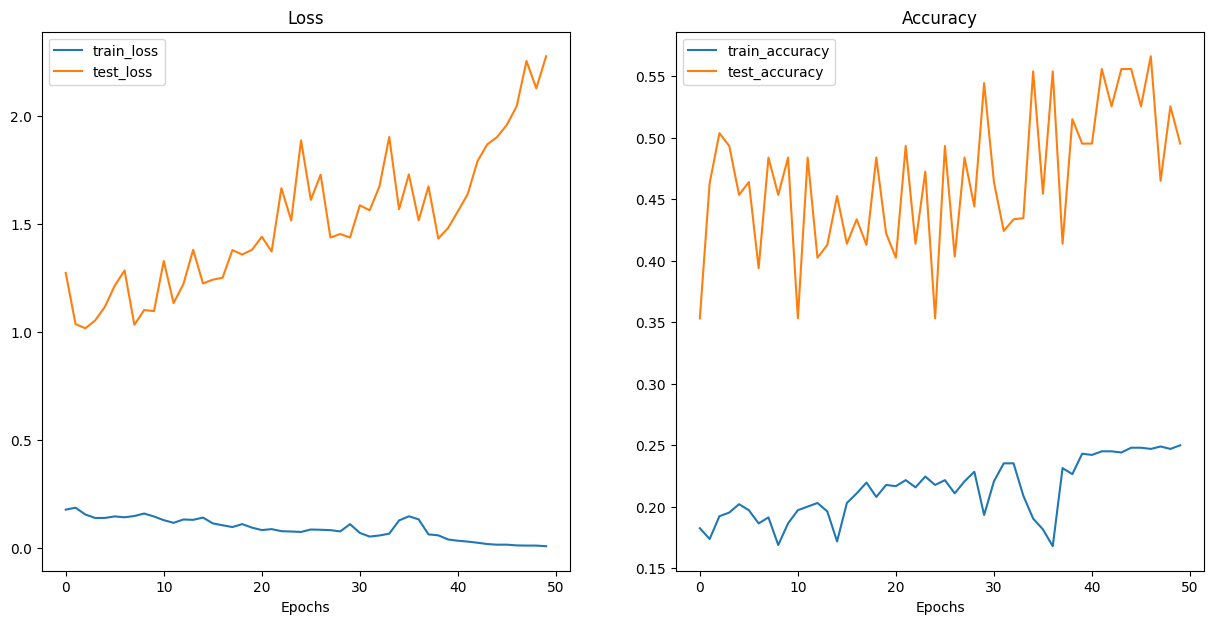

In [35]:
plot_loss_curves(model_0_results)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [36]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes))

In [37]:
model_1.to(device)
model_1_results = train(model=model_1,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2748 | train_acc: 0.0732 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 2 | train_loss: 0.2739 | train_acc: 0.1035 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 3 | train_loss: 0.2751 | train_acc: 0.0732 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 4 | train_loss: 0.2749 | train_acc: 0.0732 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 5 | train_loss: 0.2739 | train_acc: 0.1035 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 6 | train_loss: 0.2749 | train_acc: 0.0732 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 7 | train_loss: 0.2749 | train_acc: 0.0732 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 8 | train_loss: 0.2739 | train_acc: 0.1035 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 9 | train_loss: 0.2751 | train_acc: 0.0732 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 10 | train_loss: 0.2739 | train_acc: 0.1035 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 11 | train_loss: 0.2748 | train_acc: 0.0732 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 12 | train_l

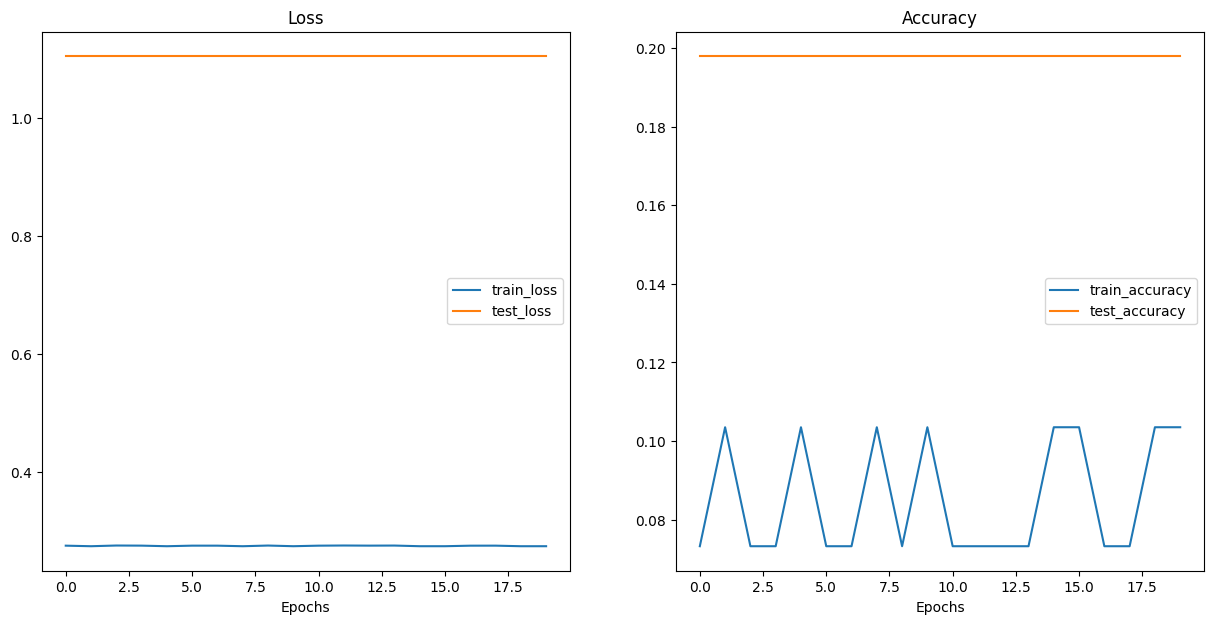

In [38]:
plot_loss_curves(model_1_results)

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [39]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [40]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.


Excellent, we now have double the training and testing images...

In [41]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [42]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data = datasets.ImageFolder(
    root=train_data_20_percent_path,
    transform=image_transform
  )
test_data = datasets.ImageFolder(
    root=test_data_20_percent_path,
    transform=image_transform
  )

# Create dataloaders
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [43]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1_results = train(model=model_1,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5149 | train_acc: 0.1572 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 2 | train_loss: 0.5149 | train_acc: 0.1572 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 3 | train_loss: 0.5154 | train_acc: 0.1426 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 4 | train_loss: 0.5149 | train_acc: 0.1572 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 5 | train_loss: 0.5154 | train_acc: 0.1426 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 6 | train_loss: 0.5154 | train_acc: 0.1426 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 7 | train_loss: 0.5153 | train_acc: 0.1426 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 8 | train_loss: 0.5144 | train_acc: 0.1719 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 9 | train_loss: 0.5154 | train_acc: 0.1426 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 10 | train_loss: 0.5155 | train_acc: 0.1426 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 11 | train_loss: 0.5148 | train_acc: 0.1572 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 12 | train_l

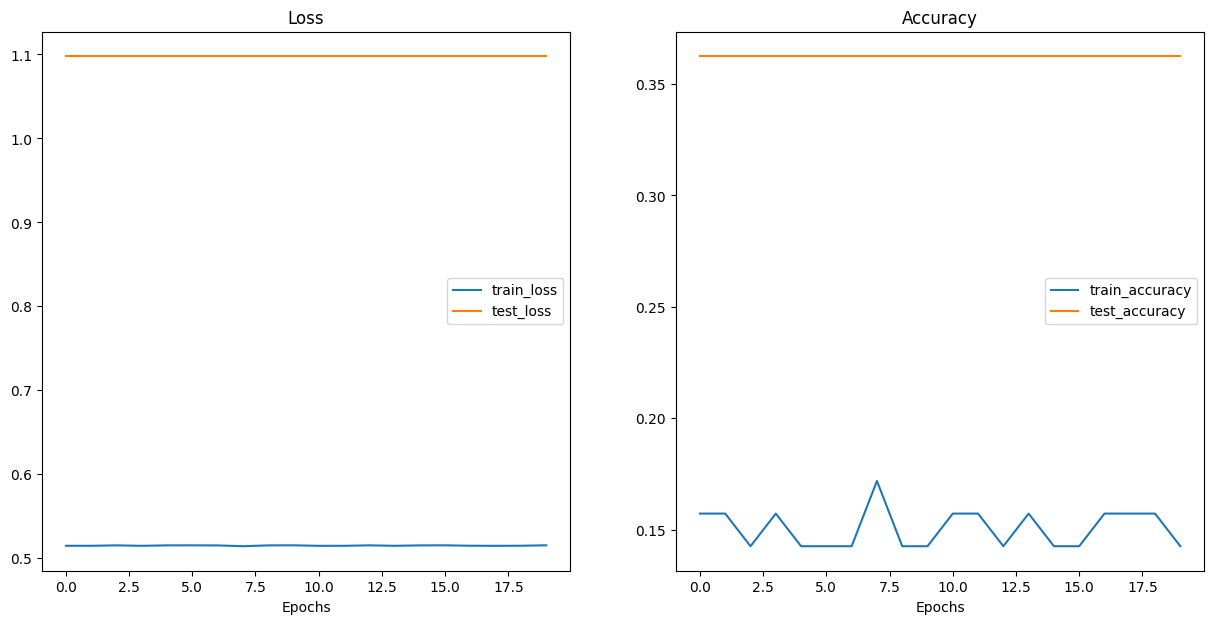

In [44]:
plot_loss_curves(model_1_results)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [45]:
test_image_path = "/content/data/test.jpg"

In [46]:
import torchvision

In [47]:
# Read in custom image
test_image_uint8 = torchvision.io.read_image(str(test_image_path))

# Print out image data
print(f"Custom image tensor:\n{test_image_uint8}\n")
print(f"Custom image shape: {test_image_uint8.shape}\n")
print(f"Custom image dtype: {test_image_uint8.dtype}")

Custom image tensor:
tensor([[[131, 140, 151,  ..., 130, 137, 143],
         [117, 126, 137,  ..., 128, 134, 138],
         [125, 134, 144,  ..., 123, 127, 130],
         ...,
         [169, 166, 161,  ..., 184, 183, 183],
         [144, 141, 136,  ..., 117, 114, 113],
         [135, 132, 128,  ..., 131, 126, 120]],

        [[ 84,  93, 104,  ..., 118, 125, 131],
         [ 70,  79,  90,  ..., 116, 122, 126],
         [ 78,  87,  97,  ..., 111, 115, 118],
         ...,
         [119, 116, 112,  ..., 143, 145, 142],
         [ 95,  92,  89,  ...,  80,  77,  76],
         [ 88,  85,  81,  ...,  94,  89,  83]],

        [[ 30,  39,  50,  ...,  92,  99, 105],
         [ 16,  25,  36,  ...,  90,  96, 100],
         [ 24,  33,  43,  ...,  85,  89,  92],
         ...,
         [ 50,  47,  45,  ...,  99, 100,  98],
         [ 26,  23,  19,  ...,  38,  33,  34],
         [ 20,  17,  13,  ...,  50,  44,  39]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 275, 183])

Custom image dtype

In [49]:
test_image_float = torchvision.io.read_image(str(test_image_path)).type(torch.float32)

In [50]:
test_image = test_image_float/255

# Print out image data
print(f"Custom image tensor:\n{test_image}\n")
print(f"Custom image shape: {test_image.shape}\n")
print(f"Custom image dtype: {test_image.dtype}")

Custom image tensor:
tensor([[[0.5137, 0.5490, 0.5922,  ..., 0.5098, 0.5373, 0.5608],
         [0.4588, 0.4941, 0.5373,  ..., 0.5020, 0.5255, 0.5412],
         [0.4902, 0.5255, 0.5647,  ..., 0.4824, 0.4980, 0.5098],
         ...,
         [0.6627, 0.6510, 0.6314,  ..., 0.7216, 0.7176, 0.7176],
         [0.5647, 0.5529, 0.5333,  ..., 0.4588, 0.4471, 0.4431],
         [0.5294, 0.5176, 0.5020,  ..., 0.5137, 0.4941, 0.4706]],

        [[0.3294, 0.3647, 0.4078,  ..., 0.4627, 0.4902, 0.5137],
         [0.2745, 0.3098, 0.3529,  ..., 0.4549, 0.4784, 0.4941],
         [0.3059, 0.3412, 0.3804,  ..., 0.4353, 0.4510, 0.4627],
         ...,
         [0.4667, 0.4549, 0.4392,  ..., 0.5608, 0.5686, 0.5569],
         [0.3725, 0.3608, 0.3490,  ..., 0.3137, 0.3020, 0.2980],
         [0.3451, 0.3333, 0.3176,  ..., 0.3686, 0.3490, 0.3255]],

        [[0.1176, 0.1529, 0.1961,  ..., 0.3608, 0.3882, 0.4118],
         [0.0627, 0.0980, 0.1412,  ..., 0.3529, 0.3765, 0.3922],
         [0.0941, 0.1294, 0.1686,  ..

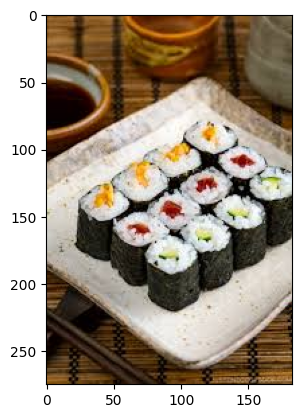

In [53]:
plt.imshow(test_image.permute(1,2,0))

In [54]:
test_iamge_transform = transforms.Compose([
     transforms.Resize(size=(64,64))
])

In [55]:
test_image = test_iamge_transform(test_image)

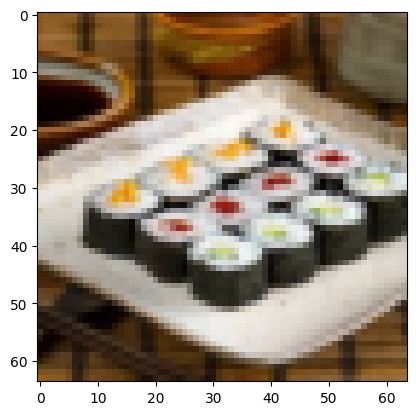

In [56]:
plt.imshow(test_image.permute(1,2,0))

In [61]:
test_image.to(device)

tensor([[[0.5349, 0.5620, 0.5343,  ..., 0.4238, 0.4549, 0.4909],
         [0.5242, 0.5531, 0.5551,  ..., 0.4083, 0.4179, 0.4227],
         [0.5320, 0.5691, 0.5633,  ..., 0.4185, 0.3907, 0.3899],
         ...,
         [0.3350, 0.3532, 0.3605,  ..., 0.4816, 0.4606, 0.4543],
         [0.4737, 0.4765, 0.4808,  ..., 0.6090, 0.6175, 0.6098],
         [0.5795, 0.5572, 0.5472,  ..., 0.5776, 0.5975, 0.5943]],

        [[0.3506, 0.3777, 0.3500,  ..., 0.3768, 0.4079, 0.4438],
         [0.3399, 0.3688, 0.3708,  ..., 0.3613, 0.3709, 0.3756],
         [0.3477, 0.3847, 0.3790,  ..., 0.3714, 0.3436, 0.3428],
         ...,
         [0.2358, 0.2507, 0.2528,  ..., 0.3225, 0.3040, 0.3022],
         [0.3185, 0.3236, 0.3287,  ..., 0.4085, 0.4193, 0.4173],
         [0.3841, 0.3638, 0.3587,  ..., 0.4138, 0.4324, 0.4315]],

        [[0.1388, 0.1659, 0.1382,  ..., 0.2792, 0.3059, 0.3418],
         [0.1281, 0.1570, 0.1591,  ..., 0.2637, 0.2689, 0.2736],
         [0.1359, 0.1730, 0.1672,  ..., 0.2738, 0.2416, 0.

In [62]:
model_1.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [67]:
test_image.shape

torch.Size([3, 64, 64])

In [69]:
with torch.inference_mode():
  test_pred = model_1(test_image.to(device).unsqueeze(dim=0))

  test_pred_class = torch.argmax(torch.softmax(test_pred, dim=1),dim=1)
  print(f"test pred class: {test_pred_class} | test pred : {train_data.classes[test_pred_class]}")

test pred class: tensor([1], device='cuda:0') | test pred : steak


- the model did not get it right, and when looking back into model_1 metrics it seems like it's **overfitting** the training data, since the training loss is significantly smaller than the testing loss
  - Epoch: 20 | **train_loss: 0.5155** | train_acc: 0.1426 | **test_loss: 1.0979** | test_acc: 0.3625

- some ways to help with this is:
  - use data augmentation <- to help the model generalize better
  - use more training data <- to help it learn more features
  - simplify the model <- maybe the model is learning unneeded patterns